<a href="https://colab.research.google.com/github/Farhan5559/PRODIGY_DS_4/blob/main/PRODIGY_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Upload & Load the CSV File**

In [ ]:
import pandas as pd
from google.colab import files
# Read the CSV file
df = pd.read_csv('twitter_training.csv', header=None, engine='python', on_bad_lines='warn')
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()

,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


***Sentiment Distribution Visualization***

In [ ]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower().strip()
    return text

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)
df.head()

,ID,Entity,Sentiment,Tweet,Clean_Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


/tmp/ipython-input-3812783365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


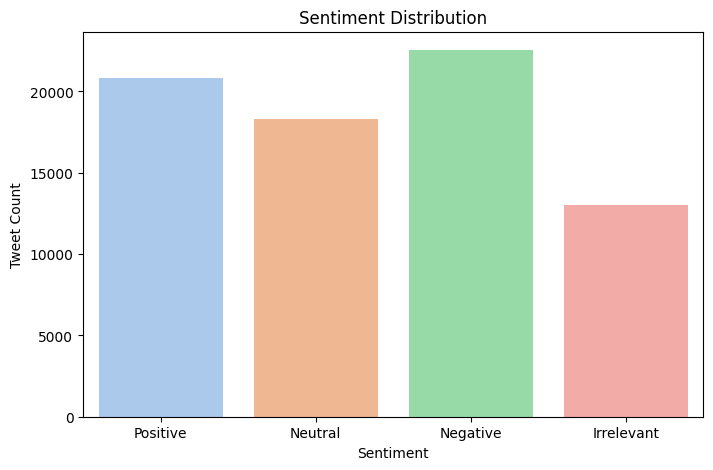

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

***WordCloud by Sentiment***

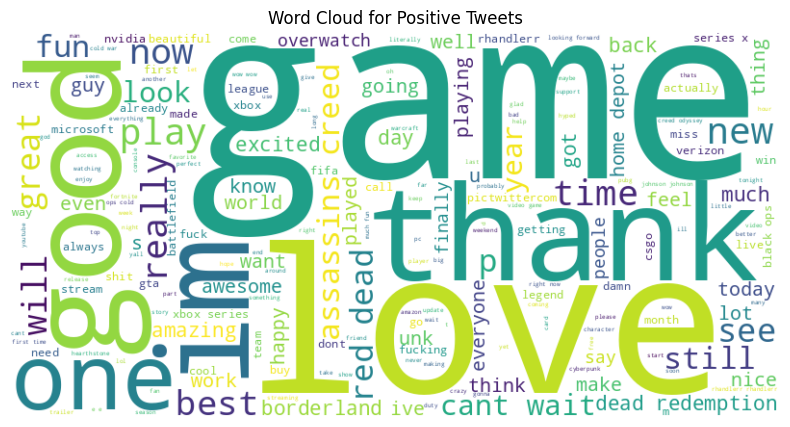

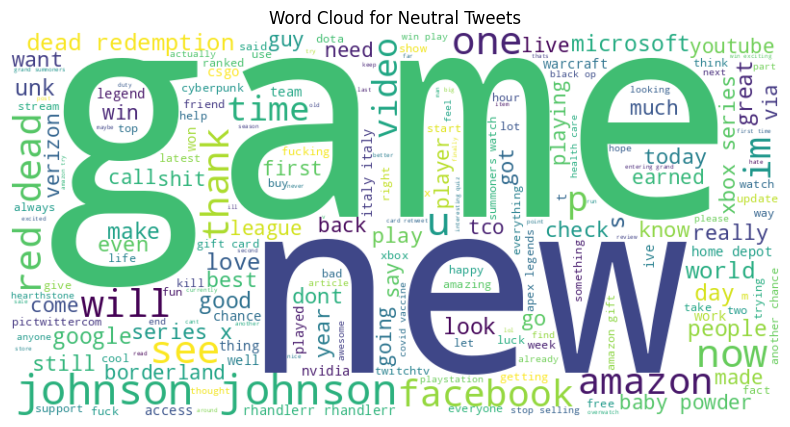

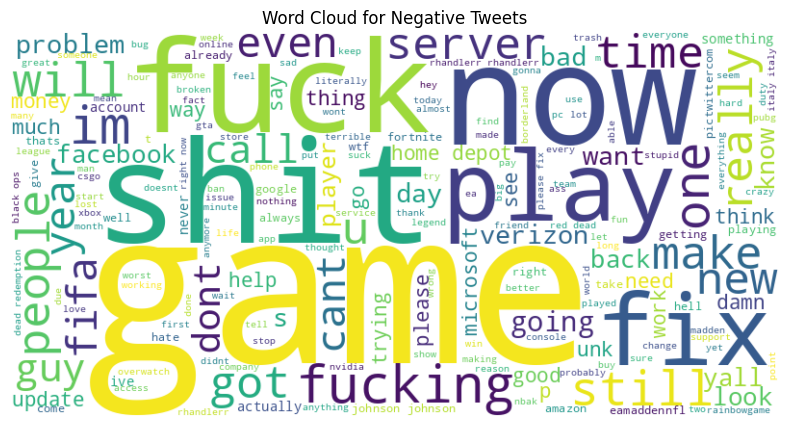

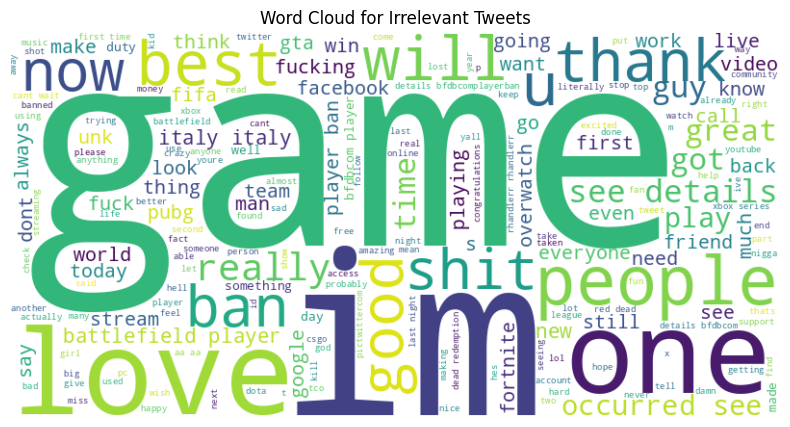

In [ ]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()
